2602160750 - Bryan Orville Audric

Regularization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Loading Dataset

In [ ]:
Dataset = pd.read_csv("/content/drive/MyDrive/Dataset/mlr_dat.csv")
Dataset.head()

,Interest_Rate,Unemployment_Rate,Stock_Index_Price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [ ]:
Dataset.describe()

,Interest_Rate,Unemployment_Rate,Stock_Index_Price
count,24.000000,24.00000,24.000000
mean,2.072917,5.77500,1070.083333
std,0.349527,0.33002,210.735341
min,1.750000,5.30000,704.000000
25%,1.750000,5.50000,928.250000
50%,2.000000,5.85000,1061.000000
75%,2.500000,6.10000,1239.000000
max,2.750000,6.20000,1464.000000


Data Visualization

<Axes: xlabel='Interest_Rate', ylabel='Stock_Index_Price'>

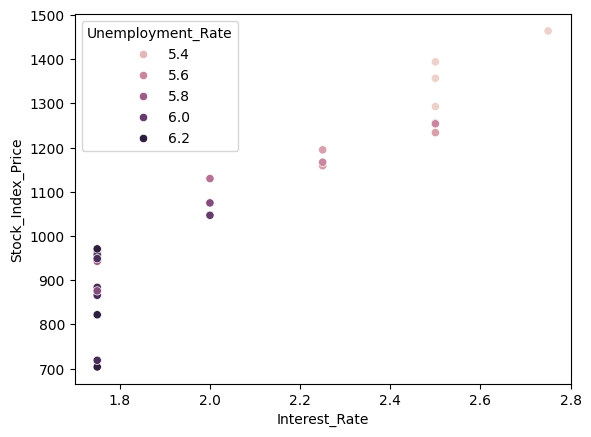

In [ ]:
import seaborn as sns

sns.scatterplot(x = 'Interest_Rate', y = 'Stock_Index_Price',data=Dataset, hue = 'Unemployment_Rate')


<Axes: >

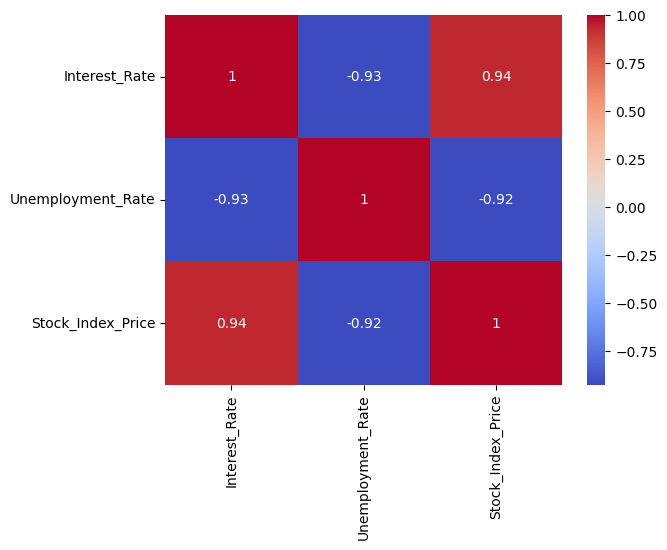

In [ ]:
sns.heatmap(Dataset.corr(),annot=True, cmap = 'coolwarm')

Splitting Dataset

In [ ]:
x = Dataset.drop(columns=['Stock_Index_Price']).values
y = Dataset['Stock_Index_Price'].values

Feature Scaling

In [ ]:
class FeatureScaling:
    def __init__(self,X,y):
        self.X=X.copy()
        if y.ndim==1:
            y=np.reshape(y,(y.shape[0],1))
        self.y=y.copy()
        self.minMax_X={}
        self.minMax_y={}

    def fit_transform_X(self):
        num_of_features=self.X.shape[1]
        for i in range(num_of_features):
            feature=self.X[:,i]
            Mean=np.mean(feature)
            Min=np.min(feature)
            Max=np.max(feature)
            feature=(feature-Mean)/(Max-Min)
            self.minMax_X[i]=np.array([Mean,Min,Max])
            self.X[:,i]=feature
        return self.X.copy()

    def fit_transform_Y(self):
        num_of_features=self.y.shape[1]
        for i in range(num_of_features):
            feature=self.y[:,i]
            Mean=np.mean(feature)
            Min=np.min(feature)
            Max=np.max(feature)
            feature=(feature-Mean)/(Max-Min)
            self.minMax_y[i]=np.array([Mean,Min,Max])
            self.y[:,i]=feature
        return np.reshape(self.y,self.y.shape[0])

    def inverse_transform_X(self,X):
        X_transformed=X.copy()
        num_of_features=X_transformed.shape[1]
        for i in range(num_of_features):
            feature=X_transformed[:,i]
            Mean=self.minMax_X[i][0]
            Min=self.minMax_X[i][1]
            Max=self.minMax_X[i][2]
            feature=feature*(Max-Min)+Mean
            X_transformed[:,i]=feature
        return X_transformed

    def inverse_transform_Y(self,y):
        y_transformed=y.copy()
        if y_transformed.ndim==1:
            y_transformed=np.reshape(y_transformed,(y_transformed.shape[0],1))
        num_of_features=y_transformed.shape[1]
        for i in range(num_of_features):
            feature=y_transformed[:,i]
            Mean=self.minMax_y[i][0]
            Min=self.minMax_y[i][1]
            Max=self.minMax_y[i][2]
            feature=feature*(Max-Min)+Mean
            y_transformed[:,i]=feature
        return np.reshape(y_transformed,y_transformed.shape[0])

    def transform_X(self,X):
        X_transformed=X.copy()
        num_of_features=X_transformed.shape[1]
        for i in range(num_of_features):
            feature=X_transformed[:,i]
            Mean=self.minMax_X[i][0]
            Min=self.minMax_y[i][1]
            Max=self.minMax_y[i][2]
            feature=(feature-Mean)/(Max-Min)
            X_transformed[:,i]=feature
        return X_transformed

    def transform_Y(self,y):
        y_transformed=y.copy()
        if y_transformed.ndim==1:
            y_transformed=np.reshape(y_transformed,(y_transformed.shape[0],1))
        num_of_features=y_transformed.shape[1]
        for i in range(num_of_features):
            feature=y_transformed[:,i]
            Mean=self.minMax_y[i][0]
            Min=self.minMax_y[i][1]
            Max=self.minMax_y[i][2]
            feature=(feature-Mean)/(Max-Min)
            y_transformed[:,i]=feature
        return np.reshape(y_transformed,y_transformed.shape[0])

    def returnX(self):
        return self.X

    def returnY(self):
        return self.y



In [ ]:
feature_scale = FeatureScaling(x,y)
x = feature_scale.fit_transform_X()

print(x)

[[ 0.67708333 -0.52777778]
 [ 0.42708333 -0.52777778]
 [ 0.42708333 -0.52777778]
 [ 0.42708333 -0.52777778]
 [ 0.42708333 -0.41666667]
 [ 0.42708333 -0.19444444]
 [ 0.42708333 -0.30555556]
 [ 0.17708333 -0.30555556]
 [ 0.17708333 -0.30555556]
 [ 0.17708333 -0.19444444]
 [-0.07291667 -0.08333333]
 [-0.07291667  0.13888889]
 [-0.07291667  0.25      ]
 [-0.32291667  0.13888889]
 [-0.32291667  0.02777778]
 [-0.32291667  0.36111111]
 [-0.32291667  0.47222222]
 [-0.32291667  0.36111111]
 [-0.32291667  0.36111111]
 [-0.32291667  0.36111111]
 [-0.32291667  0.13888889]
 [-0.32291667  0.47222222]
 [-0.32291667  0.47222222]
 [-0.32291667  0.36111111]]


Linear Regression with Gradient Descent

In [ ]:
class LinearRegression:
    def __init__(self,X,Y):
        ones=np.ones(X.shape)
        X=np.append(ones,X,axis=1)
        self.X=X
        self.Y=Y
        self.m=X.shape[0]
        self.n=X.shape[1]
        self.theta=np.random.randn(X.shape[1])

    def computeCostFunction(self):
        h=np.matmul(self.X,self.theta)
        self.J=(1/(2*self.m))*np.sum((h-self.Y)**2)
        return self.J

    def performGradientDescent(self,num_of_iter,alpha):
        self.Cost_history=[]
        self.theta_history=[]
        for x in range(num_of_iter):
            h=np.matmul(self.X,self.theta)
            J=self.computeCostFunction()
            self.Cost_history.append(J)
            self.theta_history.append(self.theta)
            temp=h-self.Y
            self.theta=self.theta-(alpha/self.m)*(self.X.T.dot(temp))
        return self.theta,self.Cost_history,self.theta_history


    def predict(self,X_test,Y_test):
        ones=np.ones(X_test.shape)
        X_test=np.append(ones,X_test,axis=1)
        self.Y_pred=np.matmul(X_test,self.theta)
        self.error_percentage=(abs(self.Y_pred-Y_test)/Y_test)*100
        return self.Y_pred,self.error_percentage

    def predictUsingNormalEquation(self,X_test,Y_test):
        ones=np.ones(X_test.shape)
        X_test=np.append(ones,X_test,axis=1)
        inv=np.linalg.inv(np.matmul(self.X.T,self.X))
        self.w=np.matmul(np.matmul(inv,self.X.T),self.Y)
        y_pred=np.matmul(X_test,self.w)
        return y_pred,(abs(Y_test-y_pred)/Y_test)*100

    def returnTheta(self):
        return self.theta

    def returnX(self):
        return self.X

    def returnY(self):
        return self.Y


In [ ]:
Linear_Regression = LinearRegression(x,y)

n_iteration = 300
alpha = 0.15

optimal_weights, cost, weight_array = Linear_Regression.performGradientDescent(n_iteration,alpha)
print(weight_array)

[array([ 1.75848807, -1.31662212, -0.18455782, -0.6927227 ]), array([162.20470818, 159.12959798,   9.71533092, -10.92796744]), array([274.51706225, 271.44195206,  19.26677376, -20.79651287]), array([353.13571011, 350.06059991,  28.48214495, -30.31139037]), array([408.1687636 , 405.09365341,  37.37337914, -39.48516834]), array([446.69190105, 443.61679086,  45.95198701, -48.3299687 ]), array([473.65809727, 470.58298707,  54.22907032, -56.85748272]), array([492.53443461, 489.45932442,  62.21533645, -65.07898633]), array([505.74787076, 502.67276057,  69.9211124 , -73.00535486]), array([514.99727606, 511.92216587,  77.3563583 , -80.64707729]), array([521.47185977, 518.39674958,  84.53068044, -88.01426997]), array([526.00406837, 522.92895818,  91.45334387, -95.11668986]), array([ 529.17661439,  526.10150419,   98.13328447, -101.9637473 ]), array([ 531.3973966 ,  528.32228641,  104.57912072, -108.5645183 ]), array([ 532.95194415,  529.87683396,  110.79916489, -114.92775644]), array([ 534.0401

Cost Function

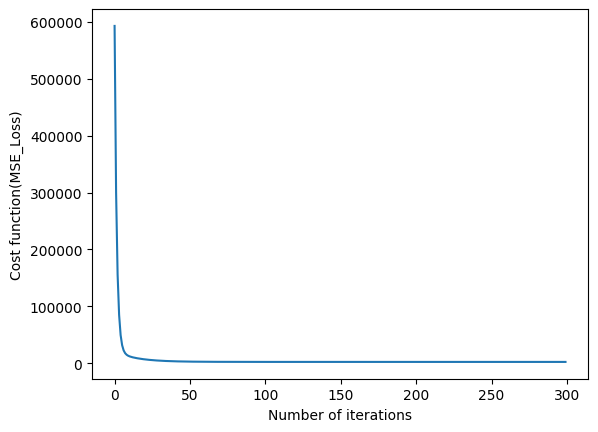

In [ ]:
ax=[i for i in range(300)]
plt.plot(ax,cost)
plt.xlabel('Number of iterations')
plt.ylabel('Cost function(MSE_Loss)')
plt.show()

Predicting using the same dataset

In [ ]:
y_pred_gradient, error = Linear_Regression.predict(x,y)

print(y_pred_gradient)

[1414.71233873 1339.90048806 1339.90048806 1339.90048806 1310.002893
 1250.2077029  1280.10529795 1205.29344728 1205.29344728 1175.39585223
 1070.68640651 1010.89121641  980.99362135  936.07936574  965.97696079
  876.28417563  846.38658058  876.28417563  876.28417563  876.28417563
  936.07936574  846.38658058  846.38658058  876.28417563]


Performance

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error

print("R^2 Score:",str(r2_score(y,y_pred_gradient)))
print("MSE: ",str(mean_squared_error(y,y_pred_gradient)))

R^2 Score: 0.8967623399102249
MSE:  4393.690858832541


Linear Regression that implements Regularization

In [ ]:
class LinearRegressionRegularization:
    def __init__(self,X,Y):
        ones=np.ones(X.shape)
        X=np.append(ones,X,axis=1)
        self.X=X
        self.Y=Y
        self.m=X.shape[0]
        self.n=X.shape[1]
        self.theta=np.random.randn(X.shape[1])

    def computeCostFunction(self,regularization_type,lmda):
        h=np.matmul(self.X,self.theta)
        self.J=(1/(2*self.m))*np.sum((h-self.Y)**2)
        #Regularization
        if regularization_type == 'Lasso':
          self.J+= lmda * np.sum(abs(self.theta))
        elif regularization_type == 'Ridge':
          self.J+= lmda * np.sum(self.theta**2)
        return self.J

    def performGradientDescent(self,num_of_iter,alpha,lmda,regularization_type):
        self.Cost_history=[]
        self.theta_history=[]
        for x in range(num_of_iter):
            h=np.matmul(self.X,self.theta)
            J=self.computeCostFunction(lmda,regularization_type)
            self.Cost_history.append(J)
            self.theta_history.append(self.theta)
            temp=h-self.Y
            self.theta=self.theta-(alpha/self.m)*(self.X.T.dot(temp))
        return self.theta,self.Cost_history,self.theta_history

    def predict(self,X_test,Y_test):
        ones=np.ones(X_test.shape)
        X_test=np.append(ones,X_test,axis=1)
        self.Y_pred=np.matmul(X_test,self.theta)
        self.error_percentage=(abs(self.Y_pred-Y_test)/Y_test)*100
        return self.Y_pred,self.error_percentage

    def predictUsingNormalEquation(self,X_test,Y_test):
        ones=np.ones(X_test.shape)
        X_test=np.append(ones,X_test,axis=1)
        inv=np.linalg.inv(np.matmul(self.X.T,self.X))
        self.w=np.matmul(np.matmul(inv,self.X.T),self.Y)
        y_pred=np.matmul(X_test,self.w)
        return y_pred,(abs(Y_test-y_pred)/Y_test)*100

    def returnTheta(self):
        return self.theta

    def returnX(self):
        return self.X

    def returnY(self):
        return self.Y

Lasso Regularization

In [ ]:
Linear_Regression_Regularization_Lasso = LinearRegressionRegularization(x,y)

n_iteration = 300
alpha = 0.15
lmda = 0.3
optimal_weights_regularization, cost_Lasso, weight_Lasso_array = Linear_Regression_Regularization_Lasso.performGradientDescent(n_iteration,alpha,lmda,regularization_type = "Lasso")
print(weight_Lasso_array)

[array([-2.43175014,  0.19560549,  0.25868785,  0.28608742]), array([158.41617156, 161.04352719,  10.16748823,  -9.96051588]), array([271.00971674, 273.63707238,  19.72749245, -19.84004832]), array([349.82519838, 352.45255401,  28.95108726, -29.36555442]), array([404.99603552, 407.62339115,  37.85021935, -38.54961529]), array([443.61562152, 446.24297715,  46.43641103, -47.40436508]), array([470.64933172, 473.27668735,  54.72077525, -55.94150686]), array([489.57292886, 492.20028449,  62.71403021, -64.17232793]), array([502.81944686, 505.44680249,  70.42651331, -72.10771463]), array([512.09200945, 514.71936509,  77.86819474, -79.75816651]), array([518.58280327, 521.21015891,  85.0486905 , -87.13381014]), array([523.12635895, 525.75371458,  91.97727497, -94.24441233]), array([ 526.30684792,  528.93420355,   98.66289307, -101.09939292]), array([ 528.5331902 ,  531.16054583,  105.11417195, -107.70783707]), array([ 530.09162979,  532.71898543,  111.33943229, -114.07850723]), array([ 531.1825

Cost Function of Lasso Regularization

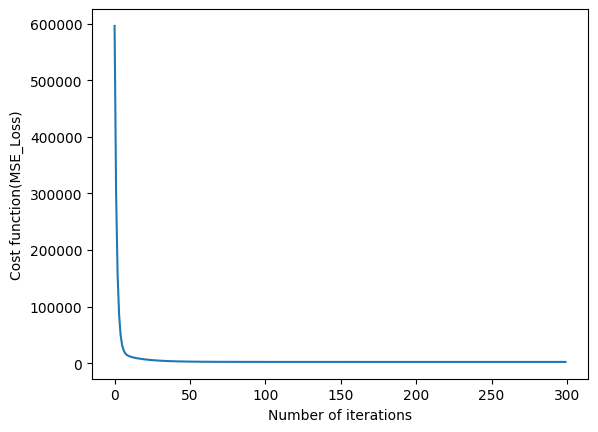

In [ ]:
ax=[i for i in range(300)]
plt.plot(ax,cost_Lasso)
plt.xlabel('Number of iterations')
plt.ylabel('Cost function(MSE_Loss)')
plt.show()

Prediction of Lasso Regularization on the same dataset

In [ ]:
y_pred_gradient_lasso, error = Linear_Regression_Regularization_Lasso.predict(x,y)

print(y_pred_gradient_lasso)

[1414.79662747 1339.86499458 1339.86499458 1339.86499458 1310.01795141
 1250.32386507 1280.17090824 1205.23927535 1205.23927535 1175.39223218
 1070.61355612 1010.91946978  981.07242661  935.98783689  965.83488006
  876.29375055  846.44670738  876.29375055  876.29375055  876.29375055
  935.98783689  846.44670738  846.44670738  876.29375055]


Performance of Lasso Regularization

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

print("R^2 Score:",str(r2_score(y,y_pred_gradient_lasso)))
print("MSE: ",str(mean_squared_error(y,y_pred_gradient_lasso)))

R^2 Score: 0.8967802836852993
MSE:  4392.927189833762


Ridge Regularization

In [ ]:
Linear_Regression_Regularization_Ridge = LinearRegressionRegularization(x,y)

n_iteration = 300
alpha = 0.15
lmda = 0.3
optimal_weights_regularization, cost_Ridge, weight_Ridge_array = Linear_Regression_Regularization_Ridge.performGradientDescent(n_iteration,alpha,lmda,regularization_type = "Ridge")
print(weight_Ridge_array)

[array([ 0.87945466, -0.35498262,  2.21400472,  0.87020636]), array([161.31328386, 160.07884657,  12.0984296 ,  -9.35433479]), array([273.61696429, 272.38252701,  21.63486274, -19.21264729]), array([352.2295406 , 350.99510332,  30.83566236, -28.71774567]), array([407.25834401, 406.02390673,  39.71274769, -37.8821821 ]), array([445.7785064 , 444.54406912,  48.27761453, -46.71806282]), array([472.74262007, 471.50818279,  56.54135027, -55.23706398]), array([491.61749964, 490.38306236,  64.51464845, -63.45044695]), array([504.82991534, 503.59547806,  72.2078227 , -71.36907299]), array([514.07860633, 512.84416905,  79.63082027, -79.00341755]), array([520.55269002, 519.31825274,  86.79323504, -86.36358388]), array([525.08454861, 523.85011133,  93.70432006, -93.45931635]), array([ 528.25684962,  527.02241234,  100.37299966, -100.3000131 ]), array([ 530.47746032,  529.24302304,  106.80788117, -106.89473845]), array([ 532.03188782,  530.79745054,  113.0172661 , -113.25223465]), array([ 533.1199

Cost Function of Ridge Regularization

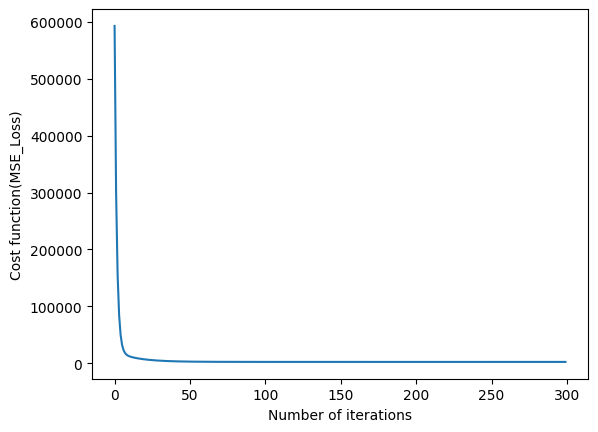

In [ ]:
ax=[i for i in range(300)]
plt.plot(ax,cost_Ridge)
plt.xlabel('Number of iterations')
plt.ylabel('Cost function(MSE_Loss)')
plt.show()

Prediction of Ridge Regularization on the same dataset

In [ ]:
y_pred_gradient_ridge, error = Linear_Regression_Regularization_Ridge.predict(x,y)

print(y_pred_gradient_ridge)

[1414.95077881 1339.80011571 1339.80011571 1339.80011571 1310.04550527
 1250.5362844  1280.29089483 1205.14023173 1205.14023173 1175.3856213
 1070.48034776 1010.97112688  981.21651644  935.82046378  965.57507422
  876.31124291  846.55663247  876.31124291  876.31124291  876.31124291
  935.82046378  846.55663247  846.55663247  876.31124291]


Performance of Ridge Regularization

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

print("R^2 Score:",str(r2_score(y,y_pred_gradient_ridge)))
print("MSE: ",str(mean_squared_error(y,y_pred_gradient_ridge)))

R^2 Score: 0.8968126114820979
MSE:  4391.551351354309


Prediction Comparison between Gradient Descent, Gradient Descent with Lasso, and Gradient Descent with Ridge

In [ ]:
Dataset2 = Dataset.copy()
Dataset2['Grad_Descent'] = y_pred_gradient
Dataset2['Grad_Descent_Lasso'] = y_pred_gradient_lasso
Dataset2['Grad_Descent_Ridge'] = y_pred_gradient_ridge
Dataset2

,Interest_Rate,Unemployment_Rate,Stock_Index_Price,Grad_Descent,Grad_Descent_Lasso,Grad_Descent_Ridge
0,2.75,5.3,1464,1414.712339,1414.796627,1414.950779
1,2.50,5.3,1394,1339.900488,1339.864995,1339.800116
2,2.50,5.3,1357,1339.900488,1339.864995,1339.800116
3,2.50,5.3,1293,1339.900488,1339.864995,1339.800116
4,2.50,5.4,1256,1310.002893,1310.017951,1310.045505
5,2.50,5.6,1254,1250.207703,1250.323865,1250.536284
6,2.50,5.5,1234,1280.105298,1280.170908,1280.290895
7,2.25,5.5,1195,1205.293447,1205.239275,1205.140232
8,2.25,5.5,1159,1205.293447,1205.239275,1205.140232
9,2.25,5.6,1167,1175.395852,1175.392232,1175.385621


Performance Comparison between Gradient Descent, Gradient Descent with Lasso, and Gradient Descent with Ridge

In [ ]:
print("R^2 Score of Gradient Descent:",str(r2_score(y,y_pred_gradient)))
print("MSE of Gradient Descent: ",str(mean_squared_error(y,y_pred_gradient)))
print("R^2 Score of Gradient Descent with Lasso:",str(r2_score(y,y_pred_gradient_lasso)))
print("MSE of Gradient Descent with Lasso: ",str(mean_squared_error(y,y_pred_gradient_lasso)))
print("R^2 Score of Gradient Descent with Ridge:",str(r2_score(y,y_pred_gradient_ridge)))
print("MSE of Gradient Descent with Ridge: ",str(mean_squared_error(y,y_pred_gradient_ridge)))

R^2 Score of Gradient Descent: 0.8967623399102249
MSE of Gradient Descent:  4393.690858832541
R^2 Score of Gradient Descent with Lasso: 0.8967802836852993
MSE of Gradient Descent with Lasso:  4392.927189833762
R^2 Score of Gradient Descent with Ridge: 0.8968126114820979
MSE of Gradient Descent with Ridge:  4391.551351354309


Linear Regression, Ridge, Lasso from sklearn

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

Linear_Regression_Sklearn = LinearRegression()
Linear_Regression_Sklearn.fit(x,y)

Ridge_Sklearn = Ridge(alpha = 0.3)
Ridge_Sklearn.fit(x,y)

Lasso_Sklearn = Lasso(alpha = 0.3)
Lasso_Sklearn.fit(x,y)

y_predict_linear_regression_sklearn = Linear_Regression_Sklearn.predict(x)
y_predict_ridge_sklearn = Ridge_Sklearn.predict(x)
y_predict_lasso_sklearn = Lasso_Sklearn.predict(x)

Dataset3 = Dataset.copy()

Dataset3['Linear_Regression_Sklearn'] = y_predict_linear_regression_sklearn
Dataset3['Ridge_Sklearn'] = y_predict_ridge_sklearn
Dataset3['Lasso_Sklearn'] = y_predict_lasso_sklearn



Prediction Comparison between Linear Regression from sklearn, Ridge Regularization from sklearn and Lasso Regularization from sklearn

In [ ]:
Dataset3

,Interest_Rate,Unemployment_Rate,Stock_Index_Price,Linear_Regression_Sklearn,Ridge_Sklearn,Lasso_Sklearn
0,2.75,5.3,1464,1422.862389,1398.733189,1421.226614
1,2.50,5.3,1394,1336.477367,1325.834814,1335.323111
2,2.50,5.3,1357,1336.477367,1325.834814,1335.323111
3,2.50,5.3,1293,1336.477367,1325.834814,1335.323111
4,2.50,5.4,1256,1311.462710,1298.210234,1310.378277
5,2.50,5.6,1254,1261.433395,1242.961074,1260.488610
6,2.50,5.5,1234,1286.448053,1270.585654,1285.433444
7,2.25,5.5,1195,1200.063031,1197.687278,1199.529940
8,2.25,5.5,1159,1200.063031,1197.687278,1199.529940
9,2.25,5.6,1167,1175.048374,1170.062698,1174.585107


Performance Comparison between Linear Regression from sklearn, Ridge Regularization from sklearn and Lasso Regularization from sklearn

In [ ]:
print("R^2 Score of Linear Regression sklearn:",str(r2_score(y,y_predict_linear_regression_sklearn)))
print("MSE of Linear Regression sklearn: ",str(mean_squared_error(y,y_predict_linear_regression_sklearn)))
print("R^2 Score of Ridge sklearn:",str(r2_score(y,y_predict_ridge_sklearn)))
print("MSE of Ridge sklearn: ",str(mean_squared_error(y,y_predict_ridge_sklearn)))
print("R^2 Score of Lasso sklearn:",str(r2_score(y,y_predict_lasso_sklearn)))
print("MSE of Lasso sklearn: ",str(mean_squared_error(y,y_predict_lasso_sklearn)))

R^2 Score of Linear Regression sklearn: 0.8976335894170216
MSE of Linear Regression sklearn:  4356.611357123125
R^2 Score of Ridge sklearn: 0.8947286412376487
MSE of Ridge sklearn:  4480.243026515805
R^2 Score of Lasso sklearn: 0.8976157201925137
MSE of Lasso sklearn:  4357.371853324869


Insights:

There wasnt any significant difference in performance because the dataset for training and testing is exactly the same. However, we can observe how regularization prevent overfitting based on the prediction result. Regularization works by putting a "penalty" to increase the cost when the prediction's value (due to weight optimization) is closer to the actual. This is why some of the result from model with regularization is a little bit off compared to the model with no regularizationn. It does this to prevent the model from making a line that really fits with the training dataset (overfitting). Therefore, when a new dataset or testing dataset is inserted to the model, the model will be able to generalize well